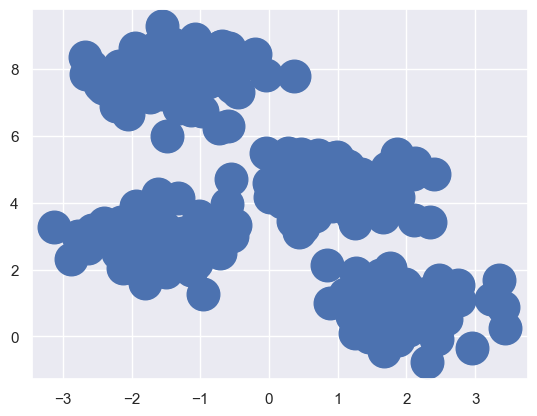

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets._samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=550);


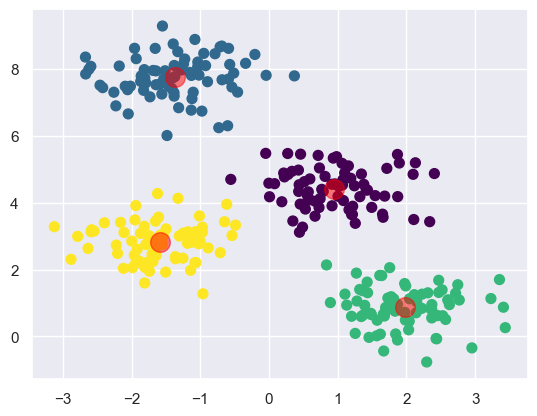

In [12]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    # Randomly choose clusters
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# Example usage of your custom function, assuming X is your dataset
centers, labels = find_clusters(X, n_clusters=4)  # Adjust n_clusters as needed

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Centers
plt.show()
